# Data Analysis of used cars from eBay Kleinanzeigen

This notebook shows an exploratory data analysis of a database provided by [Kaggle](https://www.kaggle.com/]).

The dataset contains data about over 370,000 used cars scraped from eBay Kleinanzeigen

The dataset can be downloaded from https://www.kaggle.com/orgesleka/used-cars-database

The analysis will be driven by several questions, that will be answered through tables or graphs.

In [3]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Preparation

First, let's load the database and see how it looks.

In [4]:
# Loading the dataset
dataset = pd.read_csv('dataset/autos.csv', encoding='latin-1')
# Print the first 10 rows
dataset.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Offer,650,test,limousine,1995,manuell,102,...,33775,2016-04-06 19:17:07,2016,2016,April,April,2,19,21,2
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Offer,2200,test,cabrio,2004,manuell,109,...,67112,2016-04-05 18:18:39,2016,2016,April,April,4,18,12,4
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Offer,0,test,limousine,1980,manuell,50,...,19348,2016-03-25 16:47:58,2016,2016,March,March,4,16,36,5
8,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Offer,999,test,kleinwagen,1998,manuell,101,...,27472,2016-03-31 17:17:06,2016,2016,March,March,14,17,18,11
9,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Offer,2000,control,limousine,2004,manuell,105,...,96224,2016-04-06 10:45:34,2016,2016,March,March,11,10,12,1


In [5]:
# Print the size of dataset
print('Number of columns: {}'.format(dataset.shape[1]))
print('Number of rows: {}'.format(dataset.shape[0]))

Number of columns: 27
Number of rows: 313687


So, the database has 27 columns and 313,687 rows. Let's check each one of the columns and the data types.

In [6]:
# Column names and data type (string, int, float, etc.)
dataset.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration    object
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
yearOfCreation          int64
yearCrawled             int64
monthOfCreation        object
monthCrawled           object
NoOfDaysOnline          int64
NoOfHrsOnline           int64
yearsOld                int64
monthsOld               int64
dtype: object

The only columns with a wrong data type are the *dataCrawled*, *dateCreated* and *lastSeen*, let's convert than to the date data type and set the *dataCrawled* columns as the DataFrame index.

In [7]:
# Change the data type
dataset.dateCrawled = pd.to_datetime(dataset.dateCrawled)
dataset.lastSeen = pd.to_datetime(dataset.lastSeen)
dataset.dateCreated = pd.to_datetime(dataset.dateCreated)

# Set the date as the DataFrame index
dataset.set_index('dateCrawled', inplace=True)

# Sort the DataFrame by the index
dataset.sort_index(inplace=True)

Now, let's see the start and end date of the crawl process, and how many days it took to finish:

In [8]:
print(f' Start date: {dataset.index[0]}')
print(f' End date: {dataset.index[-1]}')
print(f' Total days: {dataset.index[-1] - dataset.index[0]}')

 Start date: 2016-03-05 14:06:22
 End date: 2016-04-07 14:36:58
 Total days: 33 days 00:30:36


### Data Cleaning

Now, let's see if there is any missing value, duplicate values or any variable that need to be transformed.

In [9]:
# Checking missing values
dataset.isnull().any()

name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType            False
yearOfRegistration     False
gearbox                False
powerPS                False
model                  False
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage      False
dateCreated            False
postalCode             False
lastSeen               False
yearOfCreation         False
yearCrawled            False
monthOfCreation        False
monthCrawled           False
NoOfDaysOnline         False
NoOfHrsOnline          False
yearsOld               False
monthsOld              False
dtype: bool

The *fuelType* column has missing values, let's take a closer look and see how many.

In [10]:
dataset.fuelType.isnull().sum()

189

There is 189 missing values for *fuelType* column. As the fuelType will be important for the analysis, let's remove the rows with the missing data.

In [11]:
dataset = dataset[dataset.fuelType.notnull()]

Now let's see if there is any duplicate value in the dataset.

In [12]:
dataset.duplicated().sum()

25

There are 25 duplicated rows in the dataset, let's see some of then.

In [13]:
# print the first 10 duplicated rows
dataset[dataset.duplicated(keep=False)].head(10)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
dateCrawled,,,,,,,,,,,,,,,,,,,,,
2016-03-05 14:26:01,BMW_BMW_320d___Navi___Xenon__Leder__Voll._/_M_...,privat,Offer,11500,test,limousine,2006,manuell,163,3er,...,57539,2016-03-21 19:16:43,2016,2016,March,March,16,19,10,5
2016-03-05 14:26:55,BMW_BMW_320d___Navi___Xenon__Leder__Voll._/_M_...,privat,Offer,11500,test,limousine,2006,manuell,163,3er,...,57539,2016-03-21 19:16:43,2016,2016,March,March,16,19,10,5
2016-03-07 15:39:54,Ford_Ka_+_TÃV_NEU_+_KLIMA,privat,Offer,899,control,kleinwagen,2001,manuell,60,ka,...,52078,2016-03-12 03:45:01,2016,2016,March,March,5,3,15,8
2016-03-07 15:42:13,Ford_Ka_+_TÃV_NEU_+_KLIMA,privat,Offer,899,control,kleinwagen,2001,manuell,60,ka,...,52078,2016-03-12 03:45:01,2016,2016,March,March,5,3,15,8
2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Offer,1799,test,coupe,1999,automatik,193,clk,...,89518,2016-03-09 09:46:57,2016,2016,March,March,1,9,17,5
2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Offer,1799,test,coupe,1999,automatik,193,clk,...,89518,2016-03-09 09:46:57,2016,2016,March,March,1,9,17,5
2016-03-10 09:57:22,Opel_Cora_B_TÃV_neu_bis_2018_!!FESTPREIS!!,privat,Offer,700,test,kleinwagen,1997,manuell,56,corsa,...,13409,2016-03-12 12:44:16,2016,2016,March,March,2,12,19,2
2016-03-10 09:57:47,Opel_Cora_B_TÃV_neu_bis_2018_!!FESTPREIS!!,privat,Offer,700,test,kleinwagen,1997,manuell,56,corsa,...,13409,2016-03-12 12:44:16,2016,2016,March,March,2,12,19,2
2016-03-10 16:57:26,Opel_Corsa_1.0_12V,privat,Offer,900,control,kleinwagen,2002,manuell,58,corsa,...,64521,2016-03-22 08:46:55,2016,2016,March,March,12,8,14,7


Now, let's remove the duplicated rows:

In [14]:
dataset.drop_duplicates(inplace=True)
print(f'Number of rows: {dataset.shape[0]}')

Number of rows: 313473


That it's for the data cleaning step.
Now let's start the data analysis.


# Questions

The data analyses will be driven by several questions.

### 1) What is the distribution of vehicles by the year of registration?


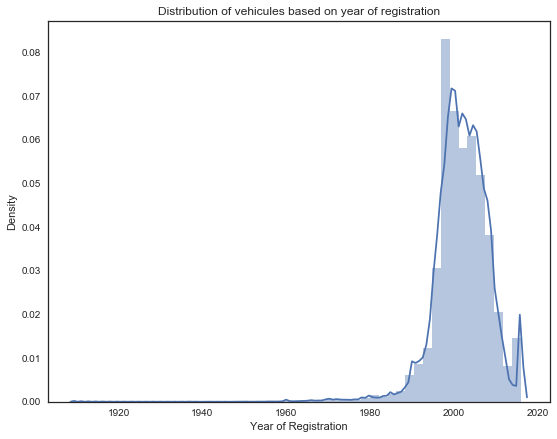

In [15]:
# Creates a plot with the distribution of vehicules based on year of registration
fig, ax = plt.subplots(figsize=(9,7))
sns.distplot(dataset['yearOfRegistration'], ax=ax)
ax.set_title('Distribution of vehicules based on year of registration')
plt.ylabel('Density')
plt.xlabel('Year of Registration')
plt.show()

 To complement the plot above we can see the frequency of car by years grouped in chunks of 5 years as presented in the table below:

In [16]:
bins = list(range(1900,2021,5))
out = pd.cut(dataset.yearOfRegistration, bins=bins)
counts = pd.value_counts(out).sort_index()

print('YEAR INTERVAL\tFREQUENCY')
print(counts)

YEAR INTERVAL	FREQUENCY
(1900, 1905]        0
(1905, 1910]       98
(1910, 1915]        1
(1915, 1920]        1
(1920, 1925]        3
(1925, 1930]       10
(1930, 1935]       10
(1935, 1940]       17
(1940, 1945]       15
(1945, 1950]       20
(1950, 1955]       41
(1955, 1960]      233
(1960, 1965]      252
(1965, 1970]      650
(1970, 1975]      765
(1975, 1980]     1393
(1980, 1985]     2047
(1985, 1990]     6086
(1990, 1995]    23454
(1995, 2000]    90309
(2000, 2005]    99213
(2005, 2010]    67645
(2010, 2015]    13126
(2015, 2020]     8084
Name: yearOfRegistration, dtype: int64


From the plot and table above we can see that the majority of cars are from the years 1990 to 2010. An interesting fact, we have almost one hundred cars registered between 1905 and 1910.

### 2) What is the Variation of the price range by type of vehicle?

So, let's see the types of vehicles in the dataset:

In [17]:
print(dataset.vehicleType.unique())

['kleinwagen' 'kombi' 'cabrio' 'suv' 'limousine' 'Other' 'bus' 'coupe'
 'andere']


For this analysis we will create a Boxplot that shows the variation and outliers (atypical value) of the data.

The figure below explain the information provided by a boxplot.

![title](images/boxplot.png)

Once we understand the boxplot, we can see the boxplots for the price range for each type of vehicle.

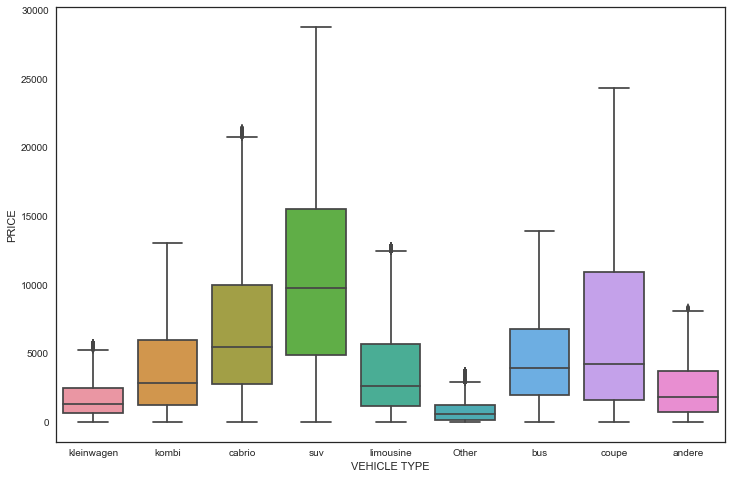

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='vehicleType', y='price', data=dataset)
ax.set_xlabel('VEHICLE TYPE')
ax.set_ylabel('PRICE')
plt.show()

From the figure above, we can see, for example, that the median value of an **SUV** is 10,000, with most values between 5000 and 15000, and the maximum price is something close to 30,000.

Also, we can see that excluding the __Other__ type,  __kleinwagen__ and __andere__ are the types of vehicles with the lowest price range.

### 3) What is the number of vehicles for selling by type of vehicle?

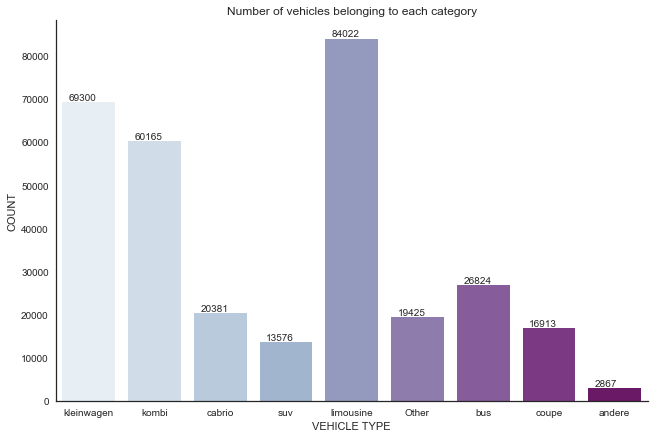

In [19]:
# Create a count plot that shows the number of vehicles belonging to each category
g = sns.factorplot(x='vehicleType', data=dataset, kind='count', size=6, aspect=1.5, palette="BuPu")
g.set_xlabels('VEHICLE TYPE')
g.set_ylabels('COUNT')
g.ax.set_title('Number of vehicles belonging to each category')

# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

From the figure above we see that the _limousine_ is the top type of car for selling, and the _andere_ has the least amount of cars for sale.

### 4) How many vehicles belong to each brand?

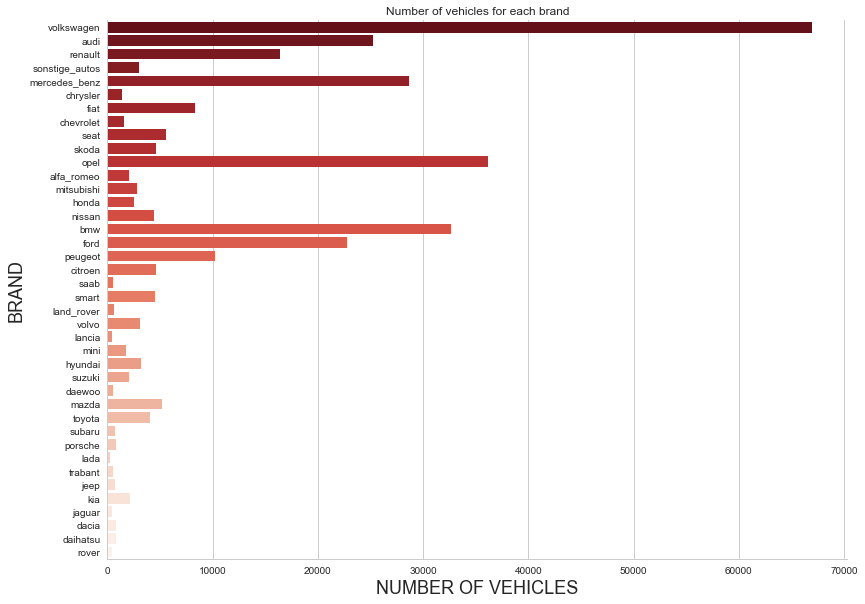

In [20]:
# Create a plot that shows the number of vehicles for each brand
sns.set_style('whitegrid')
g = sns.factorplot(y="brand", data=dataset, kind="count", palette='Reds_r', size=8, aspect=1.5)
g.ax.set_title('Number of vehicles for each brand')
g.ax.xaxis.set_label_text("NUMBER OF VEHICLES", fontdict={'size':18})
g.ax.yaxis.set_label_text("BRAND", fontdict={'size':18})
plt.show()

From the plot, we see that Volkswagen has the majority of cars for selling.

### 5) What is the average vehicle price based on the type of vehicle and the type of gearbox?

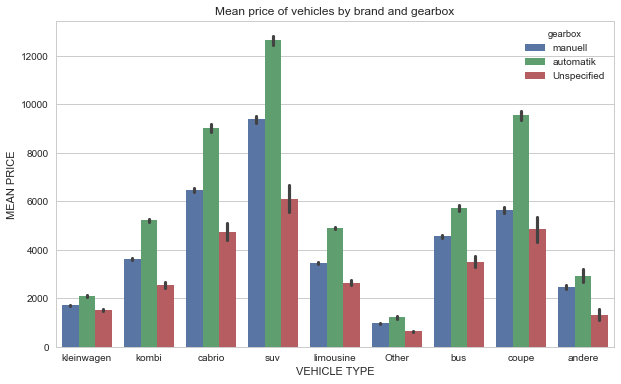

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='vehicleType', y='price', hue='gearbox', data=dataset)
ax.set_title("Mean price of vehicles by brand and gearbox")
ax.set_xlabel("VEHICLE TYPE")
ax.set_ylabel("MEAN PRICE")
plt.show()

From the plot, we see that automatic SUV has the higher mean price.

### 6) What is the average vehicle price based on the type of fuel and the type of gearbox?

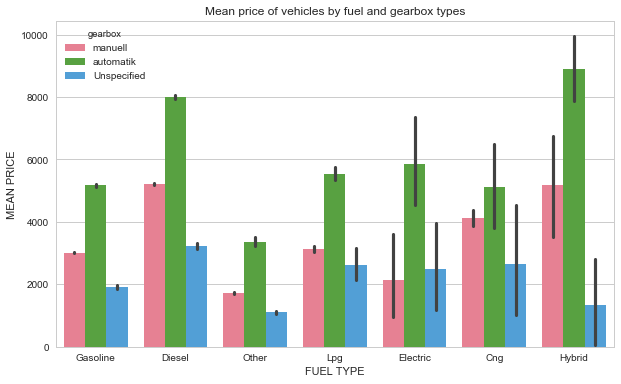

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='fuelType', y='price', hue='gearbox', palette='husl', data=dataset)
ax.set_title("Mean price of vehicles by fuel and gearbox types")
ax.set_xlabel("FUEL TYPE")
ax.set_ylabel("MEAN PRICE")
plt.show()

From the plot, we see that hybrids and automatic cars have the higher mean price.

### 7) What is the average power of a vehicle by type of vehicle and type of gearbox?

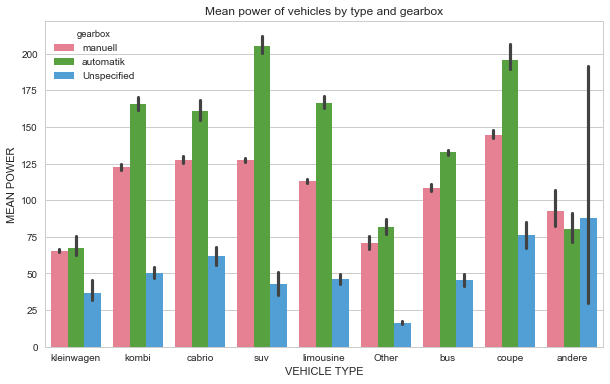

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='vehicleType', y='powerPS', hue='gearbox', palette='husl', data=dataset)
ax.set_title("Mean power of vehicles by type and gearbox")
ax.set_xlabel("VEHICLE TYPE")
ax.set_ylabel("MEAN POWER")
plt.show()

From the plot, we see that automatic SUVs cars have the higher mean power.

### 8) What is the average price of a vehicle by brand and type of vehicle?

To answer this question, let's use a heat map, that is a graphical representation of data where the individual values contained in a matrix are represented as colors.

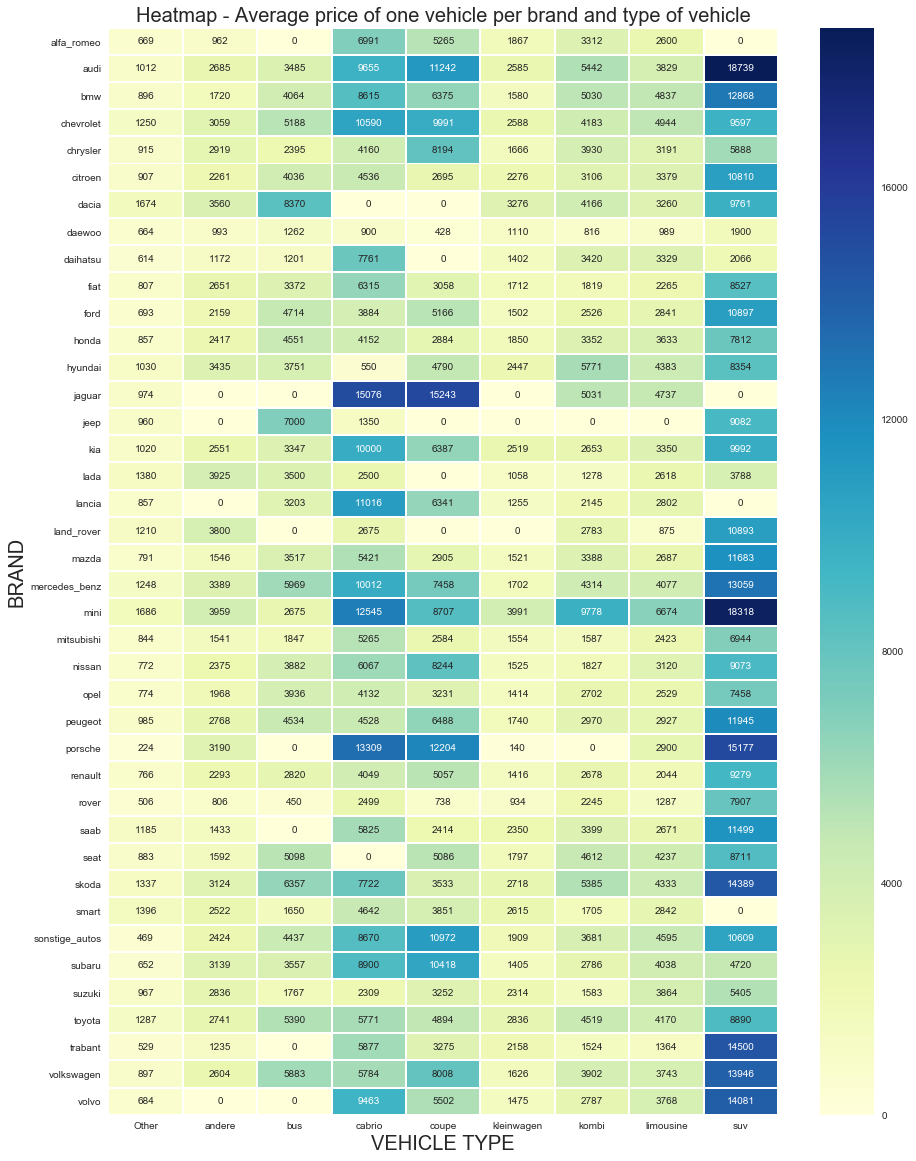

In [24]:
# Computes the mean average price per brand and type
trial = pd.DataFrame()
for b in list(dataset["brand"].unique()):
    for v in list(dataset["vehicleType"].unique()):
        z = dataset[(dataset["brand"] == b) & (dataset["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
        
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)

# Create a Heatmap with Average price of one vehicle per brand, as well as type of vehicle
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Average price of one vehicle per brand and type of vehicle",fontdict={'size':20})
ax.xaxis.set_label_text("VEHICLE TYPE",fontdict= {'size':20})
ax.yaxis.set_label_text("BRAND",fontdict= {'size':20})
plt.show()

From the heat map above we see that SUV by Audi has the higher average price.

# Final Remarks

This notebook presented a exploratory data analysis of a database of used cars scraped from eBay Kleinanzeigen.

A data cleaning process was peformed and several questions were answers through advanced visualizations.